# <center> Логистическая регрессия

Логистическая регрессия - один из методов бинарной классификации.

Загрузка данных

In [2]:
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving dia.csv to dia.csv
User uploaded file "dia.csv" with length 23927 bytes


Импорт необходимых модулей

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression as lr

## <center> Разглядывание данных

Считывание данных в датафрейм, информация о нем и просмотр его верхней части

In [4]:
df = pd.read_csv('dia.csv', sep=';', encoding='utf_8')
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Беременность      768 non-null    int64  
 1   Глюкоза           768 non-null    int64  
 2   АД                768 non-null    int64  
 3   ТолщинаКС         768 non-null    int64  
 4   Инсулин           768 non-null    int64  
 5   ИМТ               768 non-null    float64
 6   Наследственность  768 non-null    float64
 7   Возраст           768 non-null    int64  
 8   Диагноз           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Беременность,Глюкоза,АД,ТолщинаКС,Инсулин,ИМТ,Наследственность,Возраст,Диагноз
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Просмотр нижней части датафрейма

In [ ]:
df.tail(n=10)

,Беременность,Глюкоза,АД,ТолщинаКС,Инсулин,ИМТ,Наследственность,Возраст,Диагноз
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Вывод описательной статистики по датасету

In [ ]:
df.describe()

,Беременность,Глюкоза,АД,ТолщинаКС,Инсулин,ИМТ,Наследственность,Возраст,Диагноз
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Корреляционная матрица

In [ ]:
df.corr(method='pearson')


,Беременность,Глюкоза,АД,ТолщинаКС,Инсулин,ИМТ,Наследственность,Возраст,Диагноз
Беременность,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Глюкоза,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
АД,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
ТолщинаКС,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Инсулин,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
ИМТ,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Наследственность,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Возраст,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Диагноз,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Диаграмма корреляции

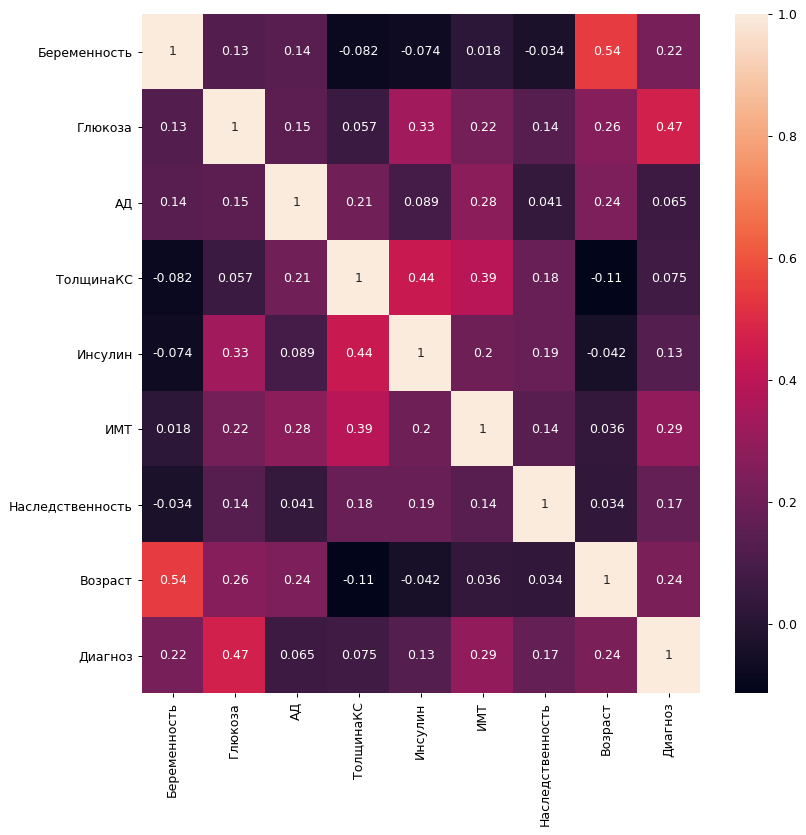

In [ ]:
plt.figure(figsize=(10,10), dpi=90)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True)

Парные диаграммы №1

<Figure size 1350x1350 with 0 Axes>

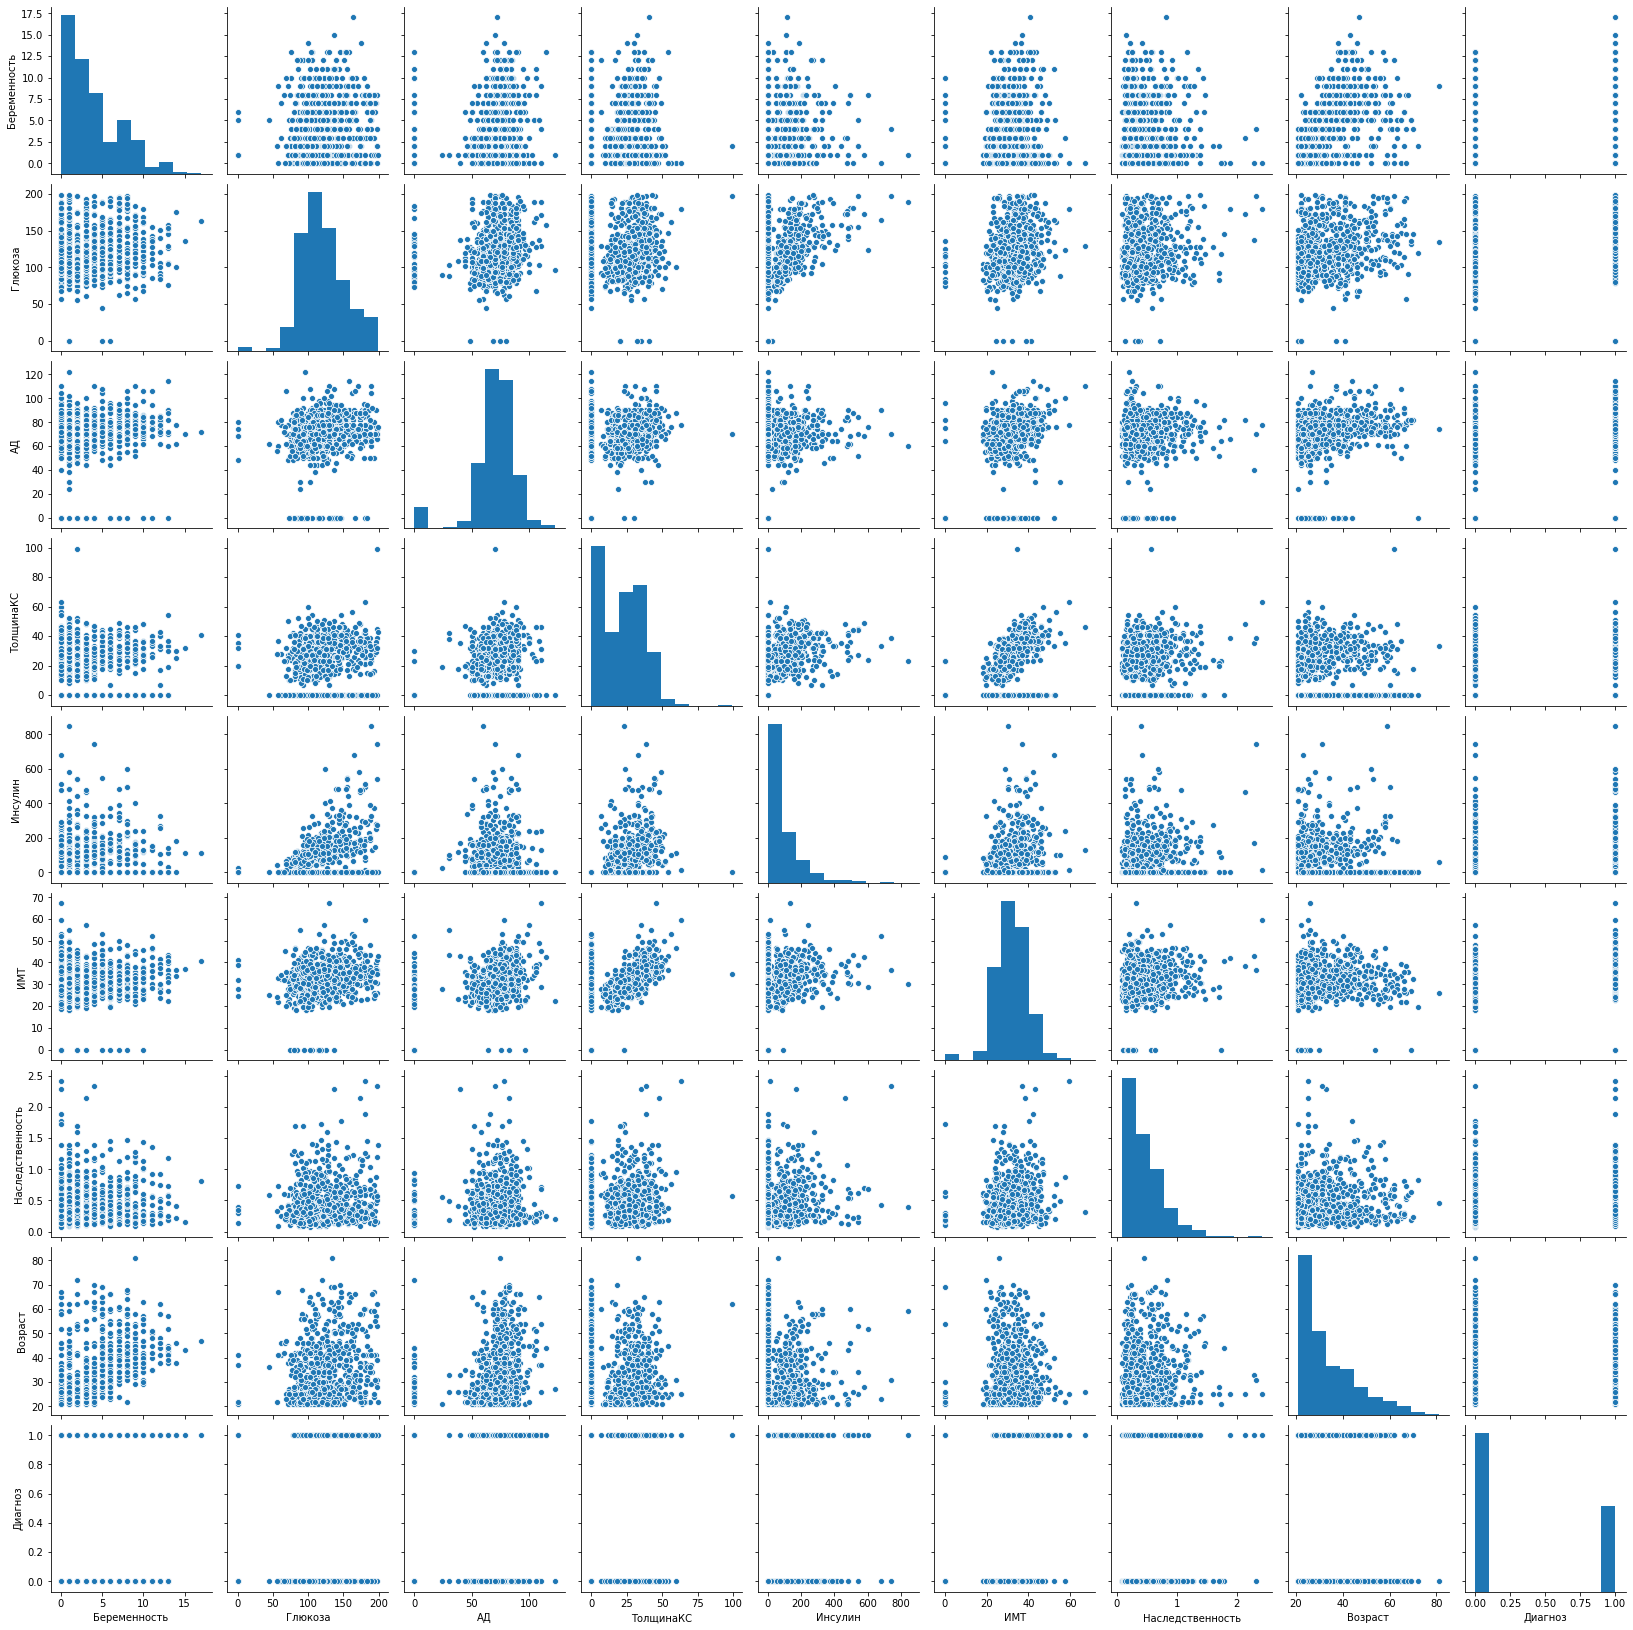

In [ ]:
plt.figure(figsize=(15,15), dpi=90)
sns.pairplot(df, kind="scatter")

Парные диаграммы №2

<Figure size 1350x1350 with 0 Axes>

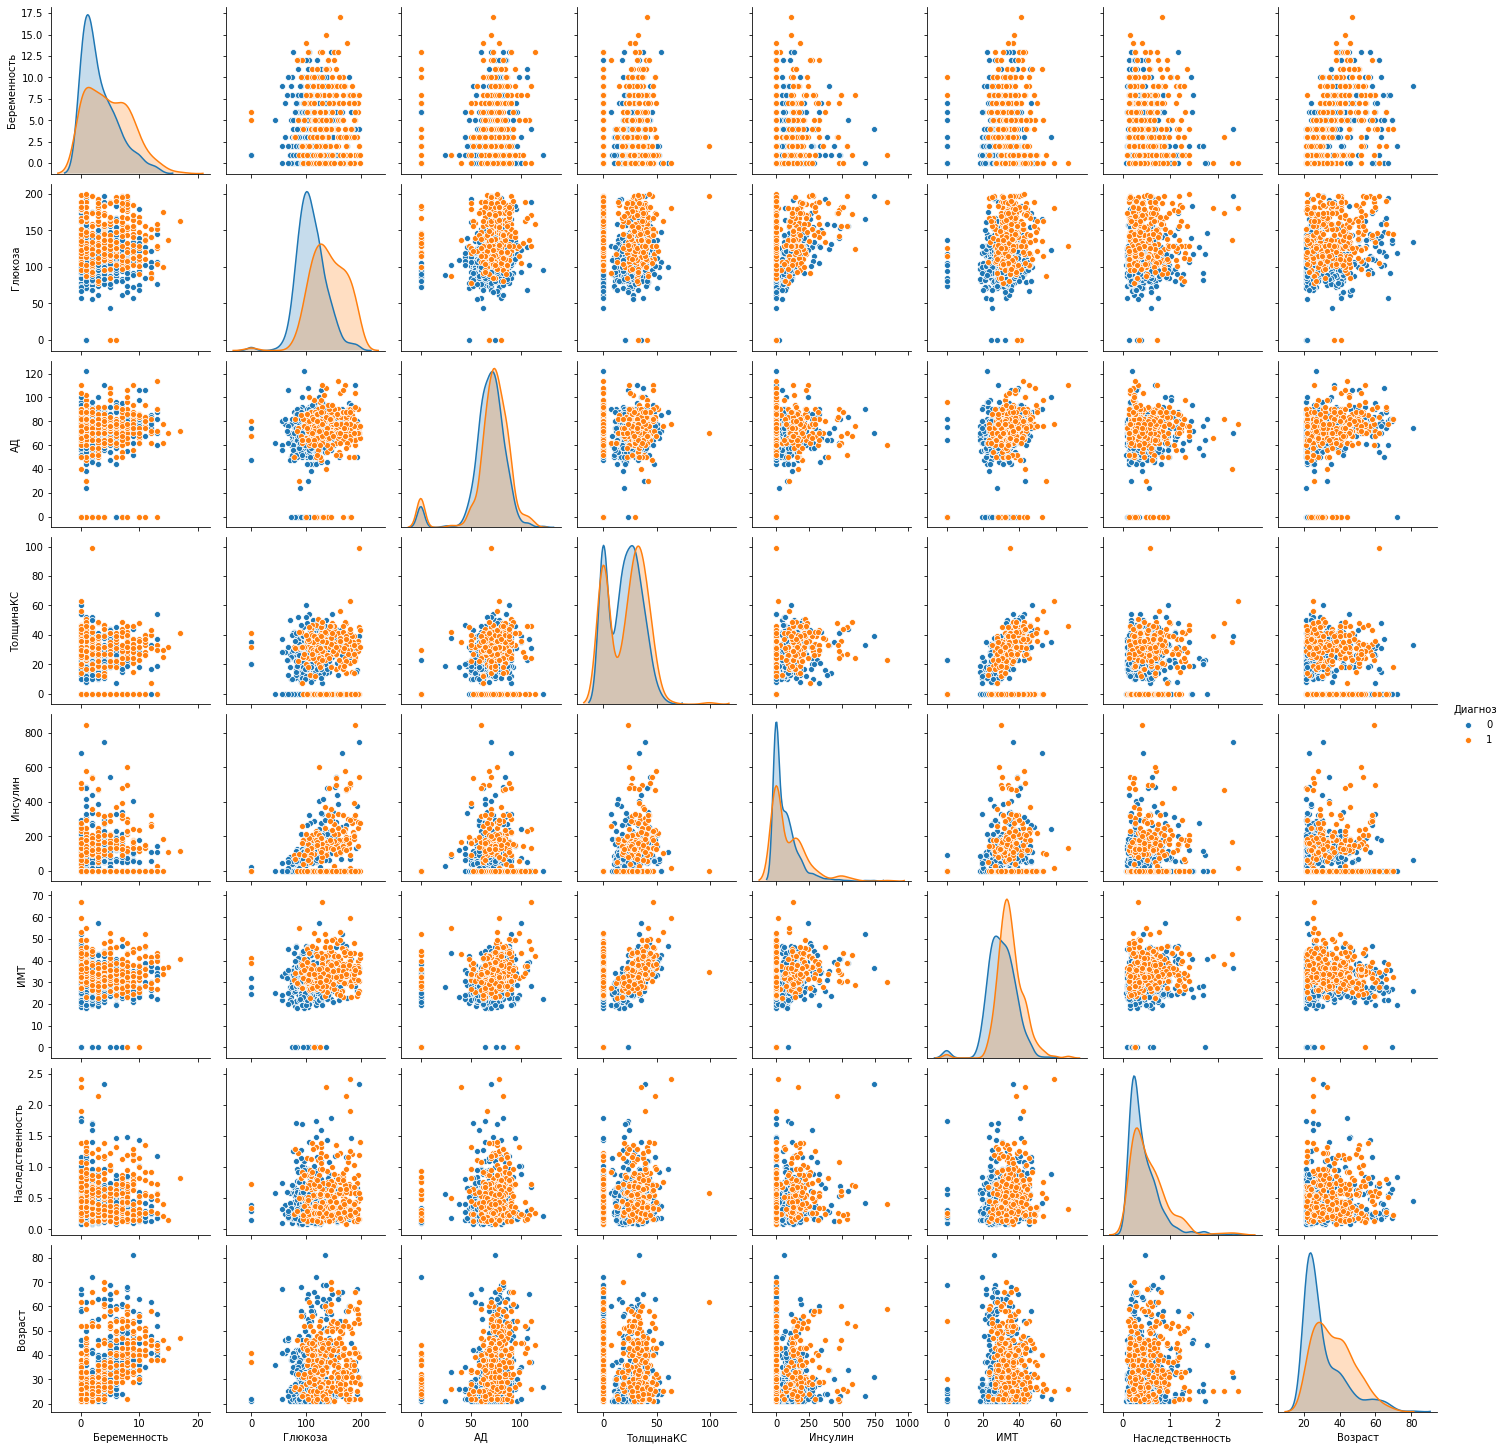

In [ ]:
plt.figure(figsize=(15,15), dpi=90)
sns.pairplot(df, kind="scatter", hue = "Диагноз")

## <center> Модель логистической регрессии с одним предиктором

Выберем в качестве независимой переменной Глюкозу, которая с точки зрения логики должна сильнее других переменных влиять на диагноз (кстати, коэффициент корреляции между этими переменными 0.47). 

Выделение зависимой (целевой) переменной y

In [5]:
y = df['Диагноз']

y=y.values


Независимая переменная

In [6]:
X = pd.DataFrame(df['Глюкоза'])
print(X.shape)
X.head(20)

(768, 1)


,Глюкоза
0,148
1,85
2,183
3,89
4,137
5,116
6,78
7,115
8,197
9,125


Разобъем датасет на обучающую и тестовую выборки

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Строим модель логистической регрессии по обучающей выборке:

In [8]:
model = lr()
model.fit(X_train, y_train)

print('a1: ', model.coef_)
#print('a0: {:.2f}'.format(model.intercept_))

a1:  [[0.03818571]]


Диаграмма рассеяния

Text(0, 0.5, 'Диагноз')

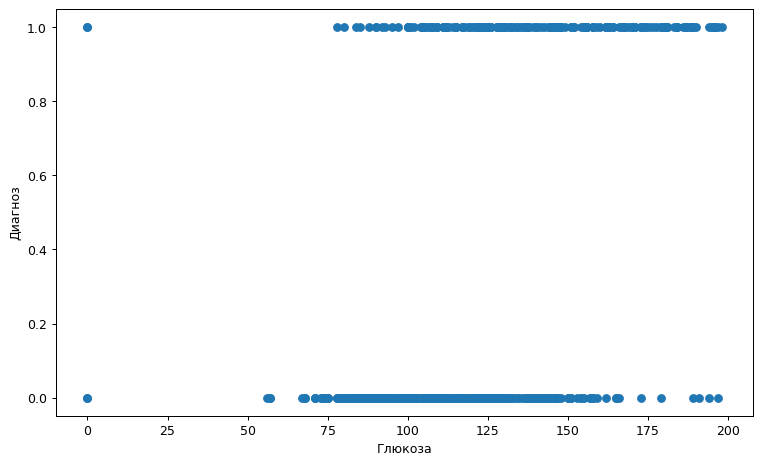

In [9]:
plt.figure(figsize=(10,6), dpi=90)
plt.scatter(X_train, y_train)
x  = np.arange(np.min(X_train).values, np.max(X_train).values,  1)

plt.xlabel('Глюкоза')
plt.ylabel('Диагноз')

Прогноз на тестовой выборке

In [10]:
y_pred = model.predict(X_test)

for i in range(len(y_pred)): print('i=', i, '| факт=', y_test[i],'| предсказ=', y_pred[i],'| дельта=', y_test[i]-y_pred[i])

i= 0 | факт= 1 | предсказ= 1 | дельта= 0
i= 1 | факт= 0 | предсказ= 0 | дельта= 0
i= 2 | факт= 0 | предсказ= 0 | дельта= 0
i= 3 | факт= 1 | предсказ= 1 | дельта= 0
i= 4 | факт= 0 | предсказ= 0 | дельта= 0
i= 5 | факт= 0 | предсказ= 0 | дельта= 0
i= 6 | факт= 1 | предсказ= 1 | дельта= 0
i= 7 | факт= 1 | предсказ= 1 | дельта= 0
i= 8 | факт= 0 | предсказ= 0 | дельта= 0
i= 9 | факт= 0 | предсказ= 0 | дельта= 0
i= 10 | факт= 1 | предсказ= 1 | дельта= 0
i= 11 | факт= 1 | предсказ= 1 | дельта= 0
i= 12 | факт= 0 | предсказ= 0 | дельта= 0
i= 13 | факт= 0 | предсказ= 0 | дельта= 0
i= 14 | факт= 0 | предсказ= 0 | дельта= 0
i= 15 | факт= 0 | предсказ= 0 | дельта= 0
i= 16 | факт= 1 | предсказ= 1 | дельта= 0
i= 17 | факт= 0 | предсказ= 0 | дельта= 0
i= 18 | факт= 0 | предсказ= 0 | дельта= 0
i= 19 | факт= 0 | предсказ= 0 | дельта= 0
i= 20 | факт= 1 | предсказ= 1 | дельта= 0
i= 21 | факт= 1 | предсказ= 0 | дельта= 1
i= 22 | факт= 0 | предсказ= 0 | дельта= 0
i= 23 | факт= 0 | предсказ= 0 | дельта= 0
i=

Оценим качество предсказания

In [11]:
pd.crosstab(y_test, y_pred)

col_0,0,1
row_0,,
0,139,18
1,41,33


Элементы на главной диагонали таблицы соответствуют верно выполненной классификации. 

Выведем основные меры качества классификации

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print(model.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       157
           1       0.65      0.45      0.53        74

    accuracy                           0.74       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.73      0.74      0.73       231

0.7445887445887446


Ещё одной мерой качества построенного классификатора может служить ROC-кривая и площадь под кривой AUC (Area under curve). Идеальный классификатор имеет AUC = 1, а монетка угадывает в половине случаев с AUC = 0.5. 

Построим ROC-кривую и найдем площадь под кривой AUC:

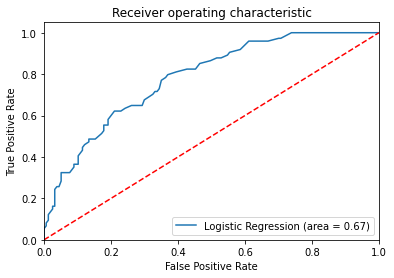

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## <center> Модель логистической регрессии с несколькими предикторами

Построим более сложную регрессионную модель, включив в нее все доступные предикторы

Выделение зависимой (целевой) переменной y



In [14]:
y = df['Диагноз']

y=y.values

Выделение независимых переменных-предикторов X

In [15]:
X = df.drop(['Диагноз'], axis=1)
print(X.shape)
X.head(20)

(768, 8)


,Беременность,Глюкоза,АД,ТолщинаКС,Инсулин,ИМТ,Наследственность,Возраст
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


Разобъем датасет на обучающую и тестовую выборки

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Строим регрессионную (линейную) модель по обучающей выборке:

In [17]:
model = lr()
model.fit(X_train, y_train)

print('a1: ', model.coef_)

a1:  [[ 0.08528091  0.03447238 -0.01082111  0.00636541 -0.0013322   0.08852969
   0.73271378  0.02415033]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Сделаем прогноз на тестовой выборке

In [18]:
y_pred = model.predict(X_test)

for i in range(len(y_pred)): print('i=', i, '| факт=', y_test[i],'| предсказ=', y_pred[i],'| дельта=', y_test[i]-y_pred[i])

i= 0 | факт= 1 | предсказ= 1 | дельта= 0
i= 1 | факт= 0 | предсказ= 0 | дельта= 0
i= 2 | факт= 0 | предсказ= 0 | дельта= 0
i= 3 | факт= 1 | предсказ= 1 | дельта= 0
i= 4 | факт= 0 | предсказ= 0 | дельта= 0
i= 5 | факт= 0 | предсказ= 0 | дельта= 0
i= 6 | факт= 1 | предсказ= 1 | дельта= 0
i= 7 | факт= 1 | предсказ= 1 | дельта= 0
i= 8 | факт= 0 | предсказ= 0 | дельта= 0
i= 9 | факт= 0 | предсказ= 0 | дельта= 0
i= 10 | факт= 1 | предсказ= 1 | дельта= 0
i= 11 | факт= 1 | предсказ= 1 | дельта= 0
i= 12 | факт= 0 | предсказ= 0 | дельта= 0
i= 13 | факт= 0 | предсказ= 0 | дельта= 0
i= 14 | факт= 0 | предсказ= 0 | дельта= 0
i= 15 | факт= 0 | предсказ= 0 | дельта= 0
i= 16 | факт= 1 | предсказ= 1 | дельта= 0
i= 17 | факт= 0 | предсказ= 0 | дельта= 0
i= 18 | факт= 0 | предсказ= 0 | дельта= 0
i= 19 | факт= 0 | предсказ= 0 | дельта= 0
i= 20 | факт= 1 | предсказ= 1 | дельта= 0
i= 21 | факт= 1 | предсказ= 0 | дельта= 1
i= 22 | факт= 0 | предсказ= 0 | дельта= 0
i= 23 | факт= 0 | предсказ= 0 | дельта= 0
i=

Оценим качество предсказания

In [19]:
pd.crosstab(y_test, y_pred)

col_0,0,1
row_0,,
0,141,16
1,35,39


In [20]:
print(classification_report(y_test, y_pred))

print(model.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

0.7792207792207793


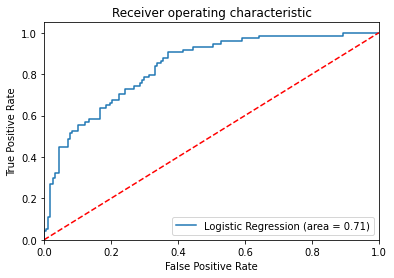

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Кроссвалидация

In [22]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(lr(), X, y, scoring='accuracy', cv=10)
 
print (cross_val)
 
print (cross_val.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.74025974 0.77922078 0.80519481 0.71428571 0.74025974 0.76623377
 0.81818182 0.80519481 0.76315789 0.82894737]
0.7760936431989064


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
